# Exercise 3 - Sampling

## Objectives
- To understand the effects of sampling in the time and frequency domains 
- To understand why sampling might cause aliasing
- To introduce uniform quantization

In [58]:
import os
os.makedirs('results/ex3', exist_ok=True)

## Lab Exercise
Let us start by thinking about the sampling process in the time domain as shown in Fig. 3.1. It may be interpreted as the multiplication between a continuous-time domain signal $x(t)$ and a train of impulses $s(t)$.

<img src="img/ex2_1.svg" alt="drawing" width="900"/>
<center>Figure 3.1: The sampling process of an continuous-time signal</center>

Observe that $x_s(t) = x(t)\times s(t) = \sum_n x(nT)\delta(t-nT),$ where $-\infty < n < \infty$ and $T=1/f_s$. This is still a continuous-time signal (variable $t$) which are zero-valued for $t \neq nT$ and should not be confused with the discrete-time signal $x[n]$, which comprises the signal amplitudes at the sampling instances and only exists for $n=0,1,2,\cdots$.

Now think about $x(t)$ and $s(t)$ and their frequency domain representations which are shown in Fig. 3.2. 

<img src="img/ex2_2.svg" alt="drawing" width="900"/>
<center>Figure 3.2: Frequency domain representation of $x(t)$ and $s(t)$</center>


You may recall that multiplication in the time domain is equivalent to convolution in the frequency domain. Therefore, the dual of $x_s(t) =x(t) \times s(t)$ in the time domain is $X_s(j\omega) = X(j\omega) * S(j\omega)$ in the frequency domain, where '$*$' denotes the linear convolution. 

Thus, $X_s(j\omega)$ is a periodic function of frequency $\omega$, consisting of the sum of shifted and scaled replicas of $X(j\omega)$, shifted by integer multiples of $\omega_s$ and scaled by $\frac{1}{T}$. 


<img src="img/ex2_3.svg" alt="drawing" width="900"/>
<center>Figure 3.3: A sampled sine wave and its spectrum</center>

### Sampling Theorem

Sampling, therefore, has the effect of creating spectral images at each and every integer multiple of $\omega_s$. Thus, to avoid corruption of information arising from overlapping spectral images (this distortion is called aliasing), the following condition must be met

---
**Definition**:
$$|\omega_m|  < \frac{\omega_s}{2} \: \text{(Nyquist frequency)}, \quad \text{where } \omega_s  =2\pi f_s =2\pi/T_s \quad \implies \quad |\Omega|  < \pi $$

---

The frequency $\omega_s/2$ is called the Nyquist frequency. If $\omega_m$ is the highest frequency component in the signal, then sampling at a rate (frequency) above twice the maximum signal frequency, $\omega_s>|2\omega_m|$, is called *oversampling*. Sampling at a rate below twice this signal frequency, $\omega_s<|2\omega_m|$, is called *undersampling*. Lastly, sampling at a rate exactly twice this maximum signal frequency, $\omega_s=|2\omega_m|$, is called *critical sampling*.

To see aliasing in action, let us generate some more plots using `sinegen` function by setting $N=100$, $f_s=8000$ Hz and varying:

$(\text{i}) \:  f=150$ Hz, $\quad  (\text{ii}) \: f=300$ Hz, $\quad (\text{iii}) \: f=600$ Hz 

$(\text{iv}) \:  f=7400$ Hz, $\quad (\text{v}) \:  f=7700$ Hz $\:$ and $\: (\text{vi}) \:  f=7850$ Hz

plot for fsig =  150


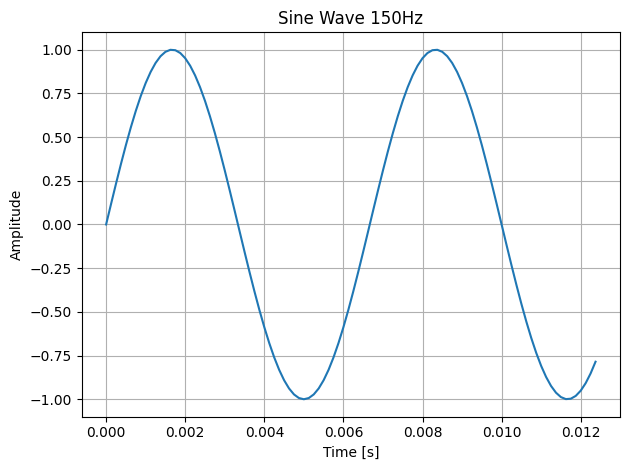

plot for fsig =  300


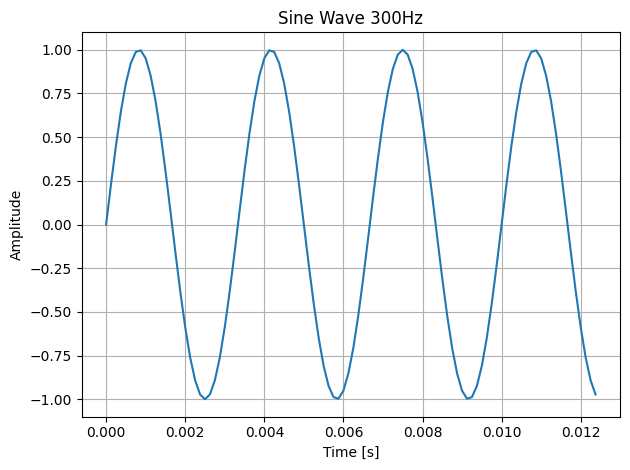

plot for fsig =  600


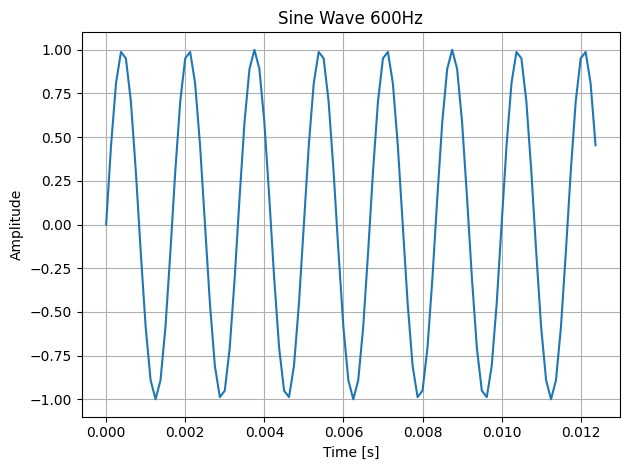

plot for fsig =  7400


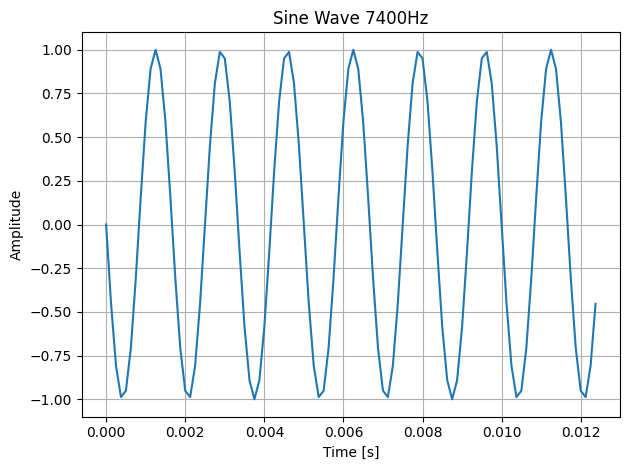

plot for fsig =  7700


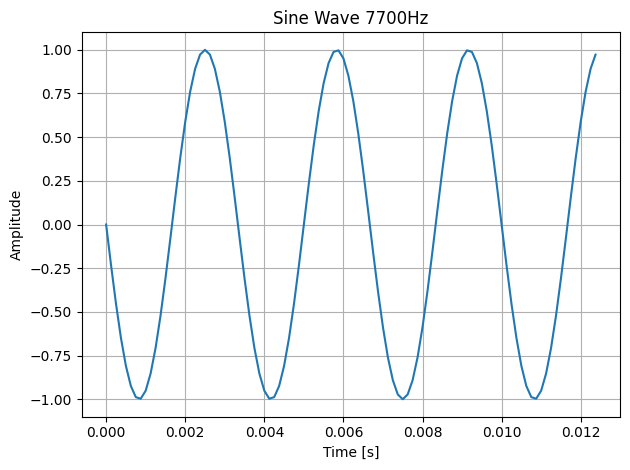

In [59]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

fs = 8000
fsig = [150, 300, 600, 7400, 7700, 7850]# change the value of fsig for parts (i) to (vi)
Nsamp = 100
for i in range(5):
    t, x = sinegen(fs, fsig[i], Nsamp)

    print("plot for fsig = ",fsig[i])
    plt = plot_signal(t, x, title='Sine Wave ' + str(fsig[i]) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
    plt.savefig('results/ex3/ex3_sine_' + str(fsig) + '_hz.pdf')
    plt.show()

The plots created above (e.g. `ex3_sine_150_hz.pdf`) will have also been saved to the `/results/ex3/` folder so you now have a record of all the plots.

**Question 3.1** Describe and discuss the results for (i)-(iii) and (iv)-(vi).

For plots fsig = 150, 300 and 600 $Hz$, I get a sine wave as expected since there is oversampling as the sampling frequency is much larger than double the frequency of the sampled signal.

For fsig = 600, the graph isn't that smooth, but this is because the number of samples is 100 so it doesn't plot too well at larger frequencies.

For fsig = 7400 $Hz$, I get an inverted sine wave with a frequency of what appears to be 600 $Hz$. This is because there is undersampling which causes some of the signal to be lost. Also this cause aliasing as the signal appears to be a negative sine wave frequency 600 $Hz$ when it isn't.

For fsig = 7700 $Hz, I get a similar result to the previous plot where I get an inverted sine wave with a frequency of what appears to be 300 $Hz$. Again this is due to undersampling which leadsto alliasing.



> fsig = 7400 gives an negative graph of a sine wave frequency 600 $Hz$. This is because 7400 - 8000 = -600 $Hz$. 
<br> Same with fsig = 7700. You get a negative sine wave with frequency 300 because 7700 - 8000 = -300 $Hz$

**Question 3.2** Predict the results for frequencies $f=24150$ Hz, $\: f=24300$ Hz and $\: f=24600$ Hz and confirm your prediction with Python.

For these frequencies there will also be alliasing as the sampling frequency is much smaller than the signal frequency. The signal is more than three times bigger than the sampling frequency. Since the signal frequency is larger than the sampling frequncy, this will cause parts of the samples to overlap making the sampled signal appear as a signal with a much smaller frequency than the original signal.

plot for fsig =  24150


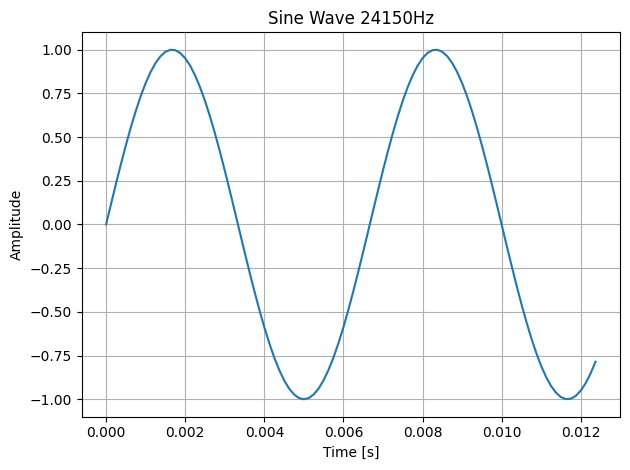

plot for fsig =  24300


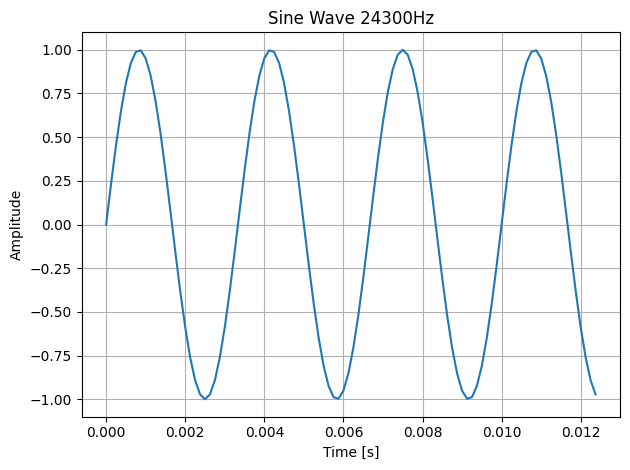

In [60]:
from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

fs = 8000
fsig = [24150, 24300, 24600]# change the value of fsig for parts (i) to (vi)
Nsamp = 100
for i in range(2):
    t, x = sinegen(fs, fsig[i], Nsamp)

    print("plot for fsig = ",fsig[i])
    plt = plot_signal(t, x, title='Sine Wave ' + str(fsig[i]) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
    plt.savefig('results/ex3/ex3_sine_' + str(fsig) + '_hz.pdf')
    plt.show()

> To find out what the alias signal will be, divide the frequency by the sampling frequency and the left over frequency will be the alliased signal you recieve. eg. 24300/8000 = 3 remainder 300 $Hz$ and the alliased signal is a sine wave with frequency 300 $Hz$

>As expected, we get a signals with a much smaller frequencies than the original signals giving us signals with frequencies of 300 and 600 $Hz$ respectively.

**Question 3.3** Consider $x(t)=\cos(100\pi t)$

$\quad$(a) Determine the minimum sampling rate to avoid aliasing

$\quad$(b) Write down an expression for $x[n]$ if a sampling frequency of 200 Hz is used.

$\quad$(c) Write down an expression for $x[n]$ if a sampling frequency of 75 Hz is used.

> To meet Nyquist sampling criteria, sampling frequency needs to be greater than 100 $Hz$.

> for sampling frequency of 200 $Hz$, $x[n] = cos(n\pi)$

> for sampling frequency of 75 $Hz$ (alliasing, since undersampling):
<br> $x[n] = cos(\frac{4}{3}n\pi)$

**Question 3.4** If the sampling frequency is 48 kHz, what is the normalised angular frequency of the discrete-time signal corresponding to a sinusoid at 1.2 kHz?

> $\Omega = 80 \pi $

**Question 3.5** Given a signal with a normalised angular frequency of $\frac{\pi}{4}$, what is its frequency expressed in terms of the sampling frequency, $f_s$?


> $f =\frac{1}{8} f_s $

### Uniform quantization change to Q

Sampling is the process by which a continuous-*time* signal, $x(t)$,  becomes a discrete-*time* signal, $x[n]$. Quantization, on the other hand, is the process by which a signal with continuous amplitude is made to assume discrete amplitudes from a defined set of **quantization levels**.

Let us consider a signal $x(t)$ with amplitudes contained in the range $\pm A$. It is quantized using a simple uniform quantizer with $Q$ equally-spaced quantization levels such that the quantization step is $W=\frac{2A}{Q-1}$. The quantized signal $x_q(t)$ is obtained by rounding the amplitude of $x(t)$ to the closest quantization level, or equivalently
$$x_q(t)=W\cdot \text{round}\big(\frac{x(t)}{W}\big)$$

For example, for $A=10$ and $N=21$, the quantization step is $W=1$ and an amplitude of $x(\tau)=9.2$ would lead to $x_q(\tau)=9$.

The quantization error is the difference between the original signal $x(t)$ and the quantized signal $x_q(t)$. 

<img src="img/ex3_quant.svg" alt="drawing" width="900"/>
<center>Figure 3.4: The sampling and quantization processes</center>

**Question 3.6** For the example above ($A=10$, $Q=21$, and $W=1$), give the maximum and minimum values that the quantization error can take.

> Quantization error = $ \pm \frac{W}{2} $
<br> $w = 1$ , Quantization error = $ \pm 0.5$

**Question 3.7** Implement the simple quantizer described above using your own `quantizer` function in the cell below. Plot a sine wave of amplitude $10$ quantized using $21$ levels.

In [61]:
def quantizer(x, dynrange, N):
    # x is the signal to quantize
    # dynrange is the as dynamic range of your quantizer expressed as a min and max value
    # N is the number of quantization levels

    # add your code here

    # w = dynrange[1] - dynrange[0]
    A = np.max(x)
    w = (2*A / (N-1))
    
    y = w * np.round(x / w)
    
    return y
    

[  0.   1.   1.   2.   2.   3.   3.   4.   4.   5.   5.   5.   6.   6.
   7.   7.   7.   8.   8.   8.   9.   9.   9.   9.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.   9.   9.   9.   9.   8.
   8.   8.   7.   7.   7.   6.   6.   5.   5.   5.   4.   4.   3.   3.
   2.   2.   1.   1.   0.  -1.  -1.  -2.  -2.  -3.  -3.  -4.  -4.  -5.
  -5.  -5.  -6.  -6.  -7.  -7.  -7.  -8.  -8.  -8.  -9.  -9.  -9.  -9.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.  -9.
  -9.  -9.  -9.  -8.  -8.  -8.  -7.  -7.  -7.  -6.  -6.  -5.  -5.  -5.
  -4.  -4.  -3.  -3.  -2.  -2.  -1.  -1.]


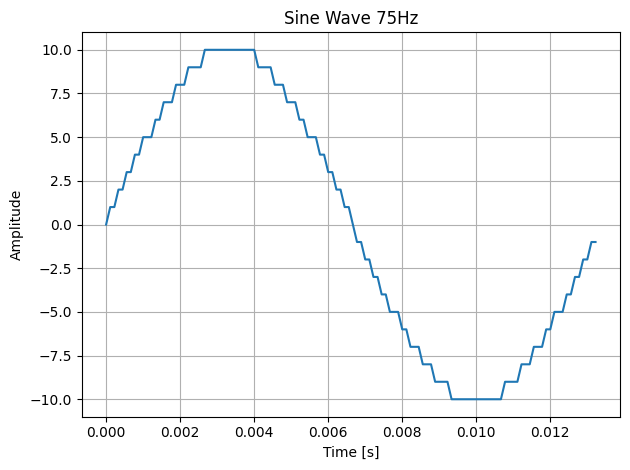

In [62]:
# plot a quantized sine wave here
fsig = 75
fs = 9000
Nsamp = 2*60
t, x = sinegen(fs, fsig, Nsamp)

dynrange = [-0.5, 0.5]
y = quantizer(10 * x, dynrange, 21)
print(y)
plt = plot_signal(t, y, title='Sine Wave ' + str(fsig) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig) + '_hz.pdf')
plt.show()

**Question 3.8** Plot the quantization error for the sine wave in Question 3.7. Does your result match your answer to Question 3.6? What is the root mean square (RMS) error? Compare this to Exercise 8 of Problem Sheet 3.

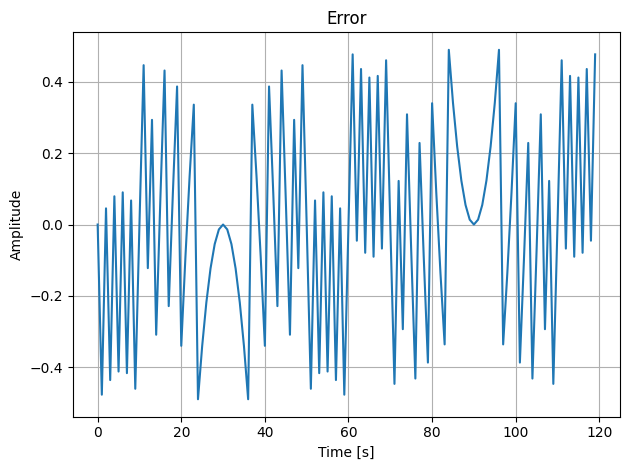

In [63]:
# plot quantization error here
error = []
for i in range(len(x)):
    error.append(-y[i] + 10*x[i])

plt = plot_signal(error, title='Error', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

In [66]:
#rms of error
ms = np.sum([np.square(e) for e in error])/len(error)
rms = np.sqrt(ms)
print(rms)
print(1/np.sqrt(12))

0.28667532771172544
0.2886751345948129
